# Ejercicio 1.

## base_init

Se trata de una base ('base_ini_interna.csv', 'base_ini_externa.txt', 'base_ini_parte1.csv') con 50,000 observaciones unicas, de 15 variables cada una:

1.  _id_            
2.  _id2_           
<br></br>
3.  fecha_inicio    
4.  comp_interno1   **float**
5.  comp_interno2   **string** (b'0', b'1')
6.  comp_interno3   **int**
7.  comp_interno4   **int**
8.  categoria1	    **int**
9.  categoria2      **int**
10. categoria3      **int**

11. comp_externo1   **float**
12. comp_externo2   **float**
13. comp_externo3   **int**
14. comp_externo4   **int**
<br>
15. comp_mixto1 **float**<br>

NOTA: La base 'bd_inicio_parte1.txt' es la base 'base_ini_interna.csv', pero con menos variables.

In [60]:
import pandas as pd
#'base_ini_interna.csv'
#'base_ini_externa.txt'

df_interna= pd.read_csv('base_ini_interna.csv')

df_externa= pd.read_csv('base_ini_externa.txt', sep=" ")

## Empezemos con los componentes internos. <br>

Por internos yo voy a asumir que es informacion que el cliente tiene con el banco, respecto a crédito.

In [61]:
df_interna.tail(10)

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
49990,23424,2017-06-30,0.000000,b'1',25.0,72.0,2.0,9.0,170.0
49991,34554,2017-09-25,0.000000,b'1',11.0,48.0,2.0,9.0,156.0
49992,63868,2019-05-17,0.000000,b'1',19.0,33.0,1.0,3.0,164.0
49993,43136,2018-02-15,0.000000,b'0',31.0,39.0,1.0,6.0,176.0
49994,19723,2017-03-16,0.000000,b'1',1.0,60.0,2.0,9.0,146.0
49995,78795,2020-04-27,0.000000,b'1',2.0,50.0,2.0,6.0,147.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0
49997,44847,2018-09-17,0.000000,b'1',3.0,58.0,2.0,9.0,148.0
49998,87200,2020-10-27,0.000000,b'1',19.0,59.0,3.0,4.0,164.0
49999,55083,2019-05-06,1013.171226,b'0',3.0,55.0,1.0,9.0,148.0


In [62]:
#Cada observacion es unica.
[len(df_interna['_id_'].unique()), len(df_interna)]

[50000, 50000]

Para el **comp_interno1**, empezamos por ver los valores unicos, el minimo y el maximo:

In [4]:
df_interna["comp_interno1"].value_counts()

0.000000        32083
1013.171226      1946
1519.756839      1481
2026.342452      1340
810.536981        914
                ...  
835.866261          1
1753.368794         1
227.963526          1
16887.537994        1
5761.904762         1
Name: comp_interno1, Length: 680, dtype: int64

In [5]:
[df_interna["comp_interno1"].min(), df_interna["comp_interno1"].max()]

[0.0, 329483.282674772]

Notamos que el minimo es 0, y el máximo es 329,483.28, y la mayoria de los registros (32,083, i.e. 64% de 50,000) tienen valor cero. <br>

Parece razonable asumir que este componente se trata del balance de crédito, la mayoría no debe nada al banco en este momento.

Para el **comp_interno2**, empezamos por preguntar Qué categorias y Cuántos registros hay de cada una?

In [6]:
df_interna['comp_interno2'].value_counts()

b'1'    35292
b'0'    14708
Name: comp_interno2, dtype: int64

<AxesSubplot:xlabel='comp_interno2', ylabel='count'>

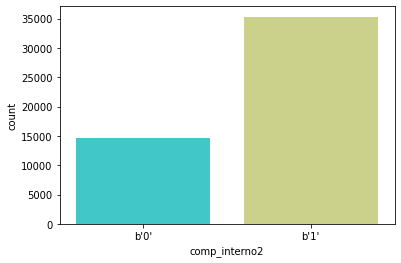

In [7]:
import seaborn as sns
sns.countplot(x='comp_interno2',data=df_interna, palette='rainbow')

La mayoría, el 70.58%, son tipo b´1´. Como vimos de comp_interno1, la mayoría de los clientes son buenos (no deben en este momento). Asumiré que la letra **b** significa si la persona alguna vez ha estado en '**b**uro de crédito'(0) o no(1). 

Para el **comp_interno3**, notamos que solo hay 32 valores!, y que el minimo es 1 y el máximo es 32:

In [8]:
len(df_interna["comp_interno3"].value_counts())

32

In [9]:
[df_interna["comp_interno3"].min(), df_interna["comp_interno3"].max()]

[1.0, 32.0]

<AxesSubplot:>

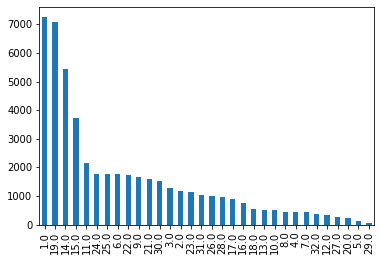

In [10]:
df_interna["comp_interno3"].value_counts().plot.bar()

Parece razonable pensar que la variable **comp_interno3** indica el número de años que el cliente lleva con el banco.

Para la variable **comp_interno4** hay 55 valores unicos, el minimo es 24 y máximo es 79. Parece que esta variable indica la edad.

In [11]:
len(df_interna["comp_interno4"].value_counts())

55

In [12]:
[df_interna["comp_interno4"].min(), df_interna["comp_interno4"].max()]

[24.0, 79.0]

<AxesSubplot:>

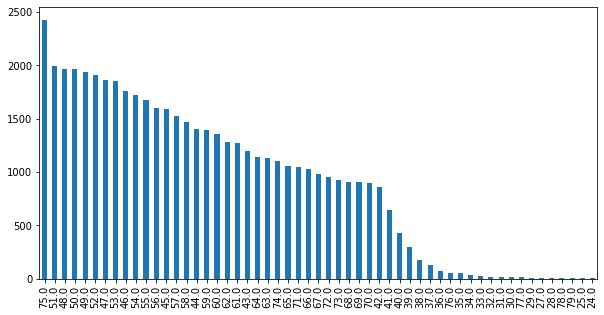

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df_interna["comp_interno4"].value_counts().plot.bar()

Para las categorias: <br> 

la **categoria1** va del 1 al 6, y la mayoría de los clientes tienen valor 1.<br>

la **categoria2** va del 1 al 13, y la mayoría de los clientes tienen valor 9.<br>

la **categoria3** va del 146 al 177, y la mayoría de los clientes tienen valor 146.

In [14]:
[len(df_interna["categoria1"].value_counts()), len(df_interna["categoria2"].value_counts()), len(df_interna["categoria3"].value_counts())]

[6, 13, 32]

In [15]:
[df_interna["categoria1"].min(), df_interna["categoria1"].max(), df_interna["categoria2"].min(), df_interna["categoria2"].max(), df_interna["categoria3"].min(), df_interna["categoria3"].max()]

[1.0, 6.0, 1.0, 13.0, 146.0, 177.0]

<AxesSubplot:title={'center':'categoria1'}>

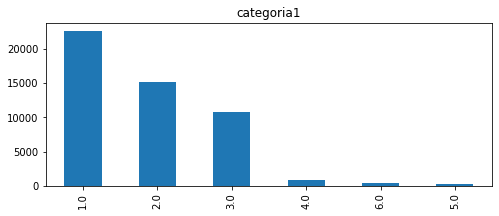

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

df_interna["categoria1"].value_counts().plot.bar(title="categoria1")

<AxesSubplot:title={'center':'categoria2'}>

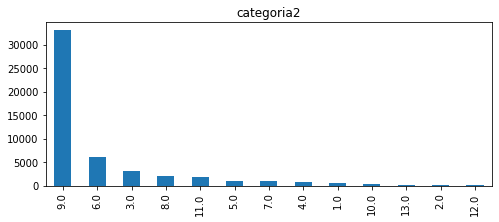

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

df_interna["categoria2"].value_counts().plot.bar(title="categoria2")

<AxesSubplot:title={'center':'categoria3'}>

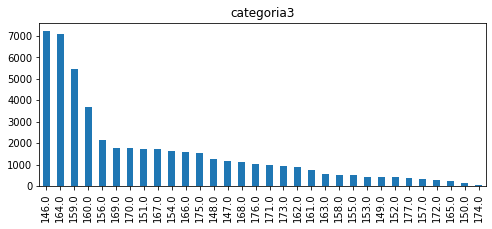

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

df_interna["categoria3"].value_counts().plot.bar(title="categoria3")

Para la **categoria1**, en base a su barplot parece que hay un orden implicito, la mayoria son tipo 1, despues tipo 2, y así, hasta tipo 6. Asumimos que esta variable representa lo valioso que es el cliente para el banco. Los tipo 1 son los más valiosos y los tipo 6 son los de menos prioridad.<br>

Podemos comparar con los componentes internos, pero no parece haber una relación clara con ninguno:

<AxesSubplot:xlabel='categoria1', ylabel='comp_interno1'>

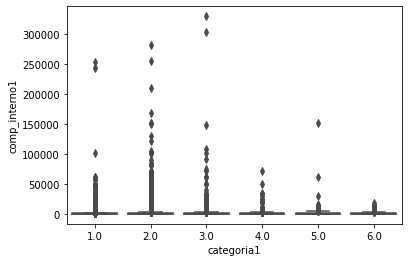

In [19]:
sns.boxplot(x='categoria1',y='comp_interno1',data=df_interna, palette='rainbow')

<AxesSubplot:xlabel='comp_interno2', ylabel='count'>

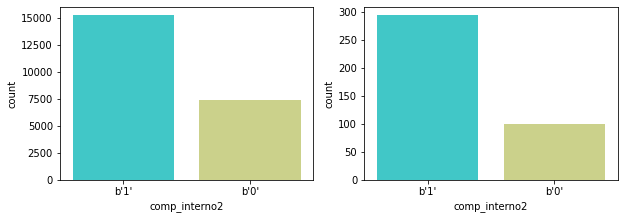

In [20]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(x='comp_interno2',data=df_interna.groupby("categoria1").get_group(1), palette='rainbow')
plt.subplot(222)
sns.countplot(x='comp_interno2',data=df_interna.groupby("categoria1").get_group(6), palette='rainbow')

<AxesSubplot:xlabel='categoria1', ylabel='comp_interno3'>

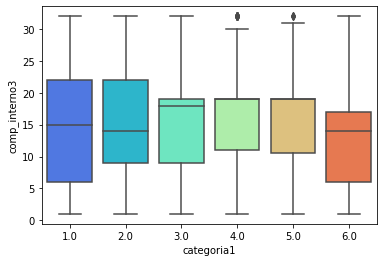

In [21]:
sns.boxplot(x='categoria1',y='comp_interno3',data=df_interna, palette='rainbow')

<AxesSubplot:xlabel='categoria1', ylabel='comp_interno4'>

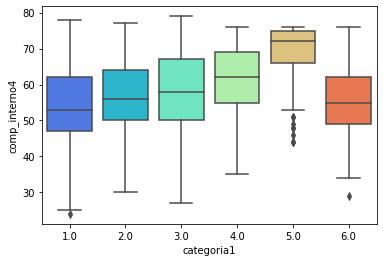

In [22]:
sns.boxplot(x='categoria1',y='comp_interno4',data=df_interna, palette='rainbow')

Parece que la categoria2 se refiere al oficio de la persona o algo así. Notamos que la mayoría son tipo 9, y la minoría tipo 12.<br>

Los del tipo 9, la mayoría no han estado en buró, y conforme se desciende segun el barplot de categoría2, la mayoría han estado en buró.

<AxesSubplot:xlabel='comp_interno2', ylabel='count'>

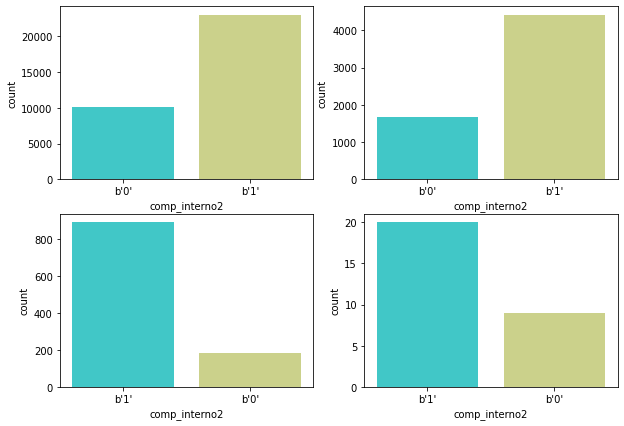

In [23]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(x='comp_interno2',data=df_interna.groupby("categoria2").get_group(9), palette='rainbow')
plt.subplot(222)
sns.countplot(x='comp_interno2',data=df_interna.groupby("categoria2").get_group(6), palette='rainbow')
plt.subplot(223)
sns.countplot(x='comp_interno2',data=df_interna.groupby("categoria2").get_group(5), palette='rainbow')
plt.subplot(224)
sns.countplot(x='comp_interno2',data=df_interna.groupby("categoria2").get_group(12), palette='rainbow')

Recordando que dijimos que el componente interno 3 lo ibamos a interpretar como el numero de años que el cliente llevaba con el banco, nos damos cuenta que la **categoria3** empieza con el codigo 146 para los clientes de menor antiguedad, y va ascendiento hasta 177 para los de mayor antiguedad:

<AxesSubplot:xlabel='categoria3', ylabel='comp_interno3'>

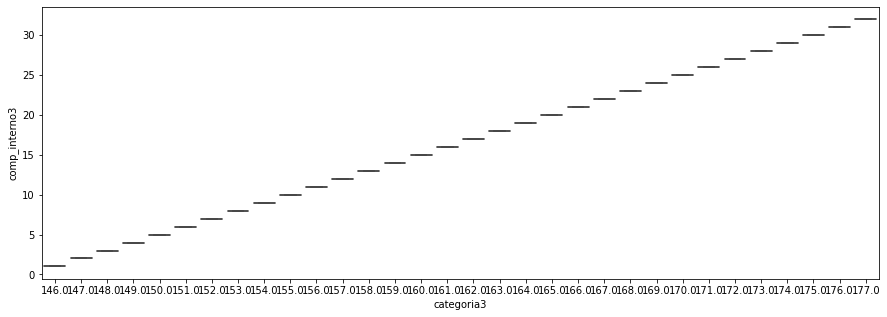

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x='categoria3',y='comp_interno3',data=df_interna, palette='rainbow')

In [25]:
df_interna.groupby('categoria3').get_group(146)['comp_interno3'].value_counts()

1.0    7240
Name: comp_interno3, dtype: int64

In [79]:
df_interna.groupby('categoria3').get_group(160)['comp_interno3'].value_counts()

15.0    3711
Name: comp_interno3, dtype: int64

## Para los componentes externos:

tenemos 4 componentes.

In [26]:
df_externa.tail(10)

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
49990,23424,NaN,NaN,89.0,-230.0
49991,34554,159.420290,15.800057,102.0,-230.0
49992,63868,78.260870,7.756392,87.0,-230.0
49993,43136,35.652174,3.533467,120.0,-230.0
49994,19723,110.144928,9.910945,122.0,-230.0
49995,78795,140.579710,13.932778,95.0,-230.0
49996,9126,188.405797,9.652399,114.0,-230.0
49997,44847,434.782609,33.323758,124.0,-230.0
49998,87200,919.130435,57.454754,108.0,-230.0
49999,55083,217.391304,18.385521,-40.0,-230.0


Para el  **componente 1**, el minimo es 0, y máximo es 2,898,550.72, y la moda es 144.92. <br>

Si estuvieramos en una escala de miles, podriamos pensar que se trata de los ahorros en pesos del cliente.

In [27]:
 df_externa['comp_externo1'].value_counts()

144.927536     1079
289.855072      790
217.391304      780
579.710145      685
434.782609      602
               ... 
291.631884        1
1496.255072       1
255.078261        1
622.362319        1
185.518841        1
Name: comp_externo1, Length: 7533, dtype: int64

In [28]:
[df_externa['comp_externo1'].min(), df_externa['comp_externo1'].max(), df_externa['comp_externo1'].mode()]

[0.0,
 2898550.7217391306,
 0    144.927536
 dtype: float64]

Para confirmar un poco nuestra sospecha, vemos que solo hay un cliente con el comp_externo1 más alto, y no ha estado en buro (comp_interno2=b'1'), y es prioritario para el banco (categoria1=1 o 2):

In [29]:
df_interna[df_interna['_id_'].isin(df_externa['_id_'][df_externa['comp_externo1']==2898550.7217391306])]

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
4228,17660,2016-10-17,0.0,b'1',1.0,63.0,2.0,3.0,146.0


Sin embargo, tambien hay clientes con comp_interno1 de miles (balances de credito), y comp_externo1=0. Es decir gente con saldo deudor, y sin ahorros (_id_'s 91953 y 88947):

In [30]:
df_interna[df_interna['_id_'].isin(df_externa['_id_'][df_externa['comp_externo1']==0.0])]

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
1429,86801,2020-10-15,0.000000,b'0',19.0,73.0,3.0,3.0,164.0
5496,33232,2017-11-09,0.000000,b'1',15.0,64.0,1.0,9.0,160.0
10036,91953,2020-12-28,3039.513678,b'1',6.0,49.0,2.0,3.0,151.0
23015,88947,2020-10-20,810.536981,b'0',16.0,70.0,2.0,11.0,161.0
28482,55820,2018-12-11,0.000000,b'0',15.0,48.0,1.0,9.0,160.0
40764,43446,2018-03-13,0.000000,b'1',3.0,44.0,3.0,9.0,148.0


In [31]:
df_externa[df_externa['_id_'].isin([91953, 88947])]

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
10036,91953,0.0,NaN,-608.0,-230.0
23015,88947,0.0,NaN,121.0,-230.0


Para el  **componente 2**, el minimo es 0, y máximo es 861, y la moda es 14.36. <br>

Si estuvieramos en una escala de miles, podriamos pensar que se trata de los ingresos mensuales en pesos del cliente.

In [32]:
 df_externa['comp_externo2'].value_counts()

14.363689    1021
21.545533     746
28.727377     574
57.454754     504
5.745475      480
             ... 
86.944556       1
93.995978       1
23.702384       1
23.510485       1
18.386670       1
Name: comp_externo2, Length: 6982, dtype: int64

In [33]:
[df_externa['comp_externo2'].min(), df_externa['comp_externo2'].max(), df_externa['comp_externo2'].mode()]

[0.0002872737719046,
 861.8213157138754,
 0    14.363689
 dtype: float64]

Para confirmar un poco nuestra sospecha, vemos que los clientes con comp_externo2 más alto no han estado en buro (comp_interno2=b'1'), y son prioritarios para el banco (categoria1=1 o 2):

In [34]:
df_interna[df_interna['_id_'].isin(df_externa['_id_'][df_externa['comp_externo2']==861.8213157138754])]

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
6602,70431,2019-09-23,5065.856130,b'1',11.0,58.0,2.0,9.0,156.0
12715,78716,2020-04-28,2026.342452,b'1',6.0,71.0,1.0,6.0,151.0
28677,65707,2019-06-19,1013.171226,b'1',8.0,54.0,1.0,9.0,153.0
34252,90748,2020-12-14,5065.856130,b'1',14.0,73.0,1.0,9.0,159.0


Sin embargo, tambien hay clientes con comp_interno1 de miles (balances de credito), y comp_externo2=0. Es decir gente con saldo deudor, y sin ingresos:

In [35]:
df_interna[df_interna['_id_'].isin(df_externa['_id_'][df_externa['comp_externo2']==0.0002872737719046])]

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
5231,26231,2017-05-26,0.000000,b'1',14.0,41.0,2.0,6.0,159.0
6975,19854,2017-01-12,17730.496454,b'0',9.0,63.0,3.0,9.0,154.0
7420,33196,2017-08-10,0.000000,b'1',6.0,71.0,3.0,11.0,151.0
8680,7461,2016-05-04,607.902736,b'1',14.0,67.0,3.0,9.0,159.0
9721,98639,2021-04-09,0.000000,b'1',28.0,62.0,4.0,9.0,173.0
10939,90673,2020-12-16,354.609929,b'0',6.0,62.0,3.0,9.0,151.0
13986,21321,2017-03-14,0.000000,b'0',16.0,54.0,2.0,9.0,161.0
16214,4716,2016-02-23,759.878419,b'1',1.0,52.0,1.0,9.0,146.0
17140,17856,2016-10-25,0.000000,b'0',1.0,75.0,3.0,11.0,146.0
18690,22317,2017-03-24,0.000000,b'0',14.0,64.0,2.0,9.0,159.0


Para esa gente, se verifica su comp_externo1, sus ingresos. La mayoría tiene ingresos que respaldan su credito, aunque no tengan ahorros.

In [36]:
df_externa[df_interna['_id_'].isin([19854, 7461, 90673, 4716,  92290, 86209, 23849, 87205, 31294, 20799, 86546, 14266])]


,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
6975,19854,78.260870,0.000287,92.0,-230.0
8680,7461,2.898551,0.000287,140.0,-230.0
10939,90673,0.002899,0.000287,129.0,-230.0
16214,4716,75.942029,0.000287,119.0,-230.0
25714,92290,51.014493,0.000287,98.0,-230.0
28968,86209,246.376812,0.000287,96.0,-230.0
29656,23849,0.002899,0.000287,126.0,-230.0
34883,87205,101.449275,0.000287,132.0,-230.0
46904,31294,8.695652,0.000287,80.0,-230.0
47509,20799,104.347826,0.000287,-30.0,-230.0


El **comp_externo3** tiene valores negativos, y no se cómo interpretarlo. 

In [37]:
df_externa["comp_externo4"].astype(int).value_counts()

-230           44431
-229            3942
-2147483648     1588
-228              34
-227               3
-226               2
Name: comp_externo4, dtype: int64

En la variable **comp_externo4**, parece haber un error. Los valores unicos son:

<ul>
<li>-226</li>
<li>-227</li>
<li>-228</li>
<li>-229</li>
<li>-230</li>
<li>-2147483648</li>
</ul>

Claramente el ultimo valor es anómalo. Hay 1588 de 50000 observaciones con este valor. **comp_externo4** es categorica, y por tanto parece que no hay problema con el ultimo valor. Solo son codigos.

## base_ini_parte1

Forma parte de la base_ini, junto con las bases interna y externa. Tiene como variables especiales comp_mixto1,e _id2_.<br>

comp_mixto1 esta en el intervalo [0.2, 0.43006]

In [63]:
#'base_ini_parte1.csv'

df_parte1 = pd.read_csv('base_ini_parte1.csv')

In [39]:
df_parte1.head(10)

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318
5,45732,1051836,0.32988
6,64416,1481568,0.34022
7,11459,263557,0.38000
8,35742,822066,0.35514
9,53185,1223255,0.37000


In [40]:
df_parte1.shape

(50000, 3)

In [41]:
[df_parte1['comp_mixto1'].min(), df_parte1['comp_mixto1'].max()]

[0.2, 0.43006]

_id2_ se usa en la base 'base_inversion.txt'. Esa base no tiene 50000 filas, sino solo 17536.<br>

Por el nombre, asumo que la base 'base_inversion.txt' indica la cantidad que tiene en inversion en el banco cada cliente.<br>

Como esta base usa _id_2, voy a asumir que la columna 'inversion' se relaciona con 'comp_mixto1' de la base_ini_parte1.<br>

Al final, lo que importa para mi es 'comp_mixto1', entre más alto, significa que la combinacion de 'inversion' y los componentes internos y externos del banco, indican que el cliente es mejor, y por tanto tiene más posibilidad de obtener un crédito. <br>

Basados en esto, voy a ignorar la base 'base_inversion.txt'. Incluye 17,536 registros. Si la incluyera, al querer las mismas variables explicativas para cada observacion, tendria que eliminar (50,000-17,536=32,464) registros.

In [42]:
#'base_inversion.txt'
df_inversion = pd.read_csv('base_inversion.txt', sep=" ")

In [43]:
len(df_inversion)

17536

In [44]:
df_inversion.head(10)

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354
5,1999436,992.635578
6,473386,1.021424
7,857992,0.105146
8,287684,4.085379
9,179952,21.695753


## CONCLUSIONES SOBRE base_init.

Ajustaré una regresion logistica, con mi variable de respuesta Y=1 que representa un buen cliente para un préstamo, y Y=0 que representa un mal cliente para un préstamo. 

Dejare afuera a la 'categoria 3' porque es la variable 'comp_interno3' pero con otros valores. Ambas representan la antiguedad
del cliente con el banco.

Finalmente, obtenemos la base 'base_init' haciendo los cambios correspondientes:


In [64]:
df_interna=df_interna.drop(labels=['fecha_inicio', 'categoria3'], axis=1)
df_externa['comp_externo4']=df_externa['comp_externo4'].astype(int)
df_parte1=df_parte1.drop(labels=['_id2_'], axis=1)

In [46]:
df_interna.head(10)

,_id_,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2
0,78213,0.000000,b'0',11.0,58.0,2.0,9.0
1,76457,0.000000,b'1',28.0,45.0,1.0,4.0
2,40666,0.000000,b'1',25.0,45.0,1.0,9.0
3,8329,0.000000,b'1',14.0,59.0,3.0,3.0
4,68389,2026.342452,b'1',1.0,67.0,2.0,9.0
5,45732,3546.099291,b'1',15.0,70.0,1.0,9.0
6,64416,557.244174,b'1',24.0,71.0,3.0,9.0
7,11459,0.000000,b'0',30.0,45.0,1.0,6.0
8,35742,506.585613,b'0',9.0,50.0,3.0,3.0
9,53185,759.878419,b'1',23.0,58.0,1.0,9.0


In [65]:
base_init=df_interna.merge(df_externa, on='_id_')
base_init.head(10)

,_id_,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,0.000000,b'0',11.0,58.0,2.0,9.0,260.869565,25.854639,56.0,-230
1,76457,0.000000,b'1',28.0,45.0,1.0,4.0,40.579710,2.872738,62.0,-230
2,40666,0.000000,b'1',25.0,45.0,1.0,9.0,NaN,NaN,119.0,-230
3,8329,0.000000,b'1',14.0,59.0,3.0,3.0,349.275362,34.616490,94.0,-230
4,68389,2026.342452,b'1',1.0,67.0,2.0,9.0,276.811594,27.434645,125.0,-230
5,45732,3546.099291,b'1',15.0,70.0,1.0,9.0,640.579710,63.487504,81.0,-230
6,64416,557.244174,b'1',24.0,71.0,3.0,9.0,NaN,NaN,-608.0,-2147483648
7,11459,0.000000,b'0',30.0,45.0,1.0,6.0,92.753623,NaN,128.0,-230
8,35742,506.585613,b'0',9.0,50.0,3.0,3.0,217.391304,21.545533,114.0,-230
9,53185,759.878419,b'1',23.0,58.0,1.0,9.0,200.000000,19.821890,109.0,-230


In [66]:
base_init=base_init.drop(base_init['_id_'][base_init['comp_externo1'].isna()].index)
base_init=base_init.drop(base_init['_id_'][base_init['comp_externo2'].isna()].index)

In [67]:
base_init=base_init.merge(df_parte1, on='_id_', how='left', suffixes=(None))
len(base_init)
base_init

c:\users\tyler\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:9186: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return merge(


,_id_,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1
0,78213,0.000000,b'0',11.0,58.0,2.0,9.0,260.869565,25.854639,56.0,-230,0.33522
1,76457,0.000000,b'1',28.0,45.0,1.0,4.0,40.579710,2.872738,62.0,-230,0.33334
2,8329,0.000000,b'1',14.0,59.0,3.0,3.0,349.275362,34.616490,94.0,-230,0.29112
3,68389,2026.342452,b'1',1.0,67.0,2.0,9.0,276.811594,27.434645,125.0,-230,0.27318
4,45732,3546.099291,b'1',15.0,70.0,1.0,9.0,640.579710,63.487504,81.0,-230,0.32988
...,...,...,...,...,...,...,...,...,...,...,...,...
44401,78795,0.000000,b'1',2.0,50.0,2.0,6.0,140.579710,13.932778,95.0,-230,0.34318
44402,9126,1215.805471,b'1',30.0,70.0,3.0,4.0,188.405797,9.652399,114.0,-230,0.38000
44403,44847,0.000000,b'1',3.0,58.0,2.0,9.0,434.782609,33.323758,124.0,-230,0.34000
44404,87200,0.000000,b'1',19.0,59.0,3.0,4.0,919.130435,57.454754,108.0,-230,0.26984


## Base_comportamiento.

Se trata de una base que almacena el comportamiento en los pagos de los créditos de cada cliente.

Se distribuye en 2 bases: 'base_comportamiento_2.txt' y 'base_comportamiento_3.csv'

Las variables son: 

1. num_caso
2. mes_informacion 
3. comportamiento_j.  El numero de pagos pendientes de un credito en un determinado mes.
4. Tiempo_aparicion. El tiempo de vida en meses de un credito, a un determinado mes. 

In [68]:
#'base_comportamiento_2.txt'
#'base_comportamiento_3.csv'

df_comp_2=pd.read_csv('base_comportamiento_2.txt', sep=" ")
df_comp_3=pd.read_csv('base_comportamiento_3.csv')

In [51]:
df_comp_2.head(10)

,num_caso,mes_informacion,Tiempo_aparicion
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,1.0
2,1,2016-06-01 00:00:00,2.0
3,1,2016-07-01 00:00:00,3.0
4,1,2016-08-01 00:00:00,4.0
5,1,2016-09-01 00:00:00,5.0
6,1,2016-10-01 00:00:00,6.0
7,1,2016-11-01 00:00:00,7.0
8,1,2016-12-01 00:00:00,8.0
9,1,2017-01-01 00:00:00,9.0


In [53]:
df_comp_3.head(10)

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0
5,1,2016-09-01 00:00:00,0.0
6,1,2016-10-01 00:00:00,0.0
7,1,2016-11-01 00:00:00,0.0
8,1,2016-12-01 00:00:00,0.0
9,1,2017-01-01 00:00:00,1.0


Notamos que tenemos 49,352 casos. En la base_init hay 50,000 registros. Esto implica que hay 648 clientes que no tienen historial crediticio registrado:

In [69]:
len(df_comp_2['num_caso'].unique())

49352

La distribucion del numero de pagos vencidos que se obtiene de la columna 'comportamiento_j' muestra que a 3 decimales, la cantidad de clientes que alguna vez tuvieron un credito con más de 9 pagos vencidos es 0%:

In [55]:
(100*df_comp_3['comportamiento_j'].value_counts(normalize=True).round(4)).astype(str)+"%"

0.0       88.46000000000001%
1.0                    9.75%
2.0                     0.8%
3.0                    0.43%
4.0                    0.16%
5.0                    0.11%
6.0                    0.09%
7.0     0.06999999999999999%
8.0     0.06999999999999999%
9.0                    0.06%
10.0                    0.0%
12.0                    0.0%
11.0                    0.0%
13.0                    0.0%
18.0                    0.0%
16.0                    0.0%
14.0                    0.0%
15.0                    0.0%
Name: comportamiento_j, dtype: object

Con base a esto, este banco decide clasificar como clientes aptos para un prestamo a aquellos cuyo máximo de pagos vencidos sea 6. Es decir, clasifica como 1 a estos, y 0 a todos los demas. Con esto, le prestaríamos al 98% de nuestra cartera actual:

In [56]:
len(df_comp_3['num_caso'][df_comp_3['comportamiento_j']>6].value_counts())/len(df_comp_2['num_caso'].unique())

0.020971794456151726

In [70]:
d = {'num_caso': df_comp_3['num_caso'].unique().tolist(), 'credito_1si_0no': [1] * len(df_comp_3['num_caso'].unique())}
df_clasif = pd.DataFrame(data=d)
df_clasif.head(10)

,num_caso,credito_1si_0no
0,1,1
1,7,1
2,8,1
3,9,1
4,10,1
5,14,1
6,18,1
7,21,1
8,22,1
9,24,1


In [71]:
df_clasif['credito_1si_0no'][df_clasif['num_caso'].isin(df_comp_3['num_caso'][df_comp_3['comportamiento_j']>6].unique())]=0

df_clasif[966:1000]

,num_caso,credito_1si_0no
966,1943,1
967,1953,1
968,1958,0
969,1960,1
970,1962,1
971,1964,1
972,1965,1
973,1966,1
974,1967,1
975,1968,1


## Modelo de Regresion Logística.

Se ajusta un modelo de regresion logistica a los datos seleccionados. Para esta parte, se usa el archivo "T1_1.R"

porque es mas comodo para mi hacer el modelo en R. Aqui simplemente obtenemos la base final, y la importamos a un archivo

base_final.csv :

In [72]:
df_clasif.rename(columns={'num_caso': '_id_'}, inplace=True)
base_init=base_init.merge(df_clasif, on='_id_', suffixes=(None))
base_init.to_csv("base_final.csv")

c:\users\tyler\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:9186: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return merge(


In [59]:
pd.read_csv('base_final.csv').head(10)

,Unnamed: 0,_id_,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,credito_1si_0no
0,0,78213,0.000000,b'0',11.0,58.0,2.0,9.0,260.869565,25.854639,56.0,-230,0.33522,1
1,1,76457,0.000000,b'1',28.0,45.0,1.0,4.0,40.579710,2.872738,62.0,-230,0.33334,1
2,2,8329,0.000000,b'1',14.0,59.0,3.0,3.0,349.275362,34.616490,94.0,-230,0.29112,1
3,3,68389,2026.342452,b'1',1.0,67.0,2.0,9.0,276.811594,27.434645,125.0,-230,0.27318,1
4,4,45732,3546.099291,b'1',15.0,70.0,1.0,9.0,640.579710,63.487504,81.0,-230,0.32988,1
5,5,35742,506.585613,b'0',9.0,50.0,3.0,3.0,217.391304,21.545533,114.0,-230,0.35514,1
6,6,53185,759.878419,b'1',23.0,58.0,1.0,9.0,200.000000,19.821890,109.0,-230,0.37000,1
7,7,98701,0.000000,b'1',19.0,50.0,3.0,9.0,558.840580,55.386383,125.0,-230,0.36508,1
8,8,82374,0.000000,b'1',22.0,61.0,1.0,9.0,214.202899,21.229532,37.0,-230,0.31664,1
9,9,86932,2532.928065,b'1',26.0,59.0,3.0,9.0,420.289855,41.654697,118.0,-230,0.33008,1


# Problema 2:

De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. 
Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import*
from scipy.stats import spearmanr
import statistics
#'data_schools.xlsx'
schools=pd.read_excel('data_schools.xlsx')
schools.head(10)

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
5,6,576,3.39
6,7,620,3.10
7,8,615,3.40
8,9,553,2.97
9,10,607,2.91


In [6]:
#Dado una lista de numeros, esta funcion calcula su error estandar empirico.

def error_estandar(arr):
    media=mean(np.random.choice(arr,len(arr),replace=True))
    arr=(arr-media)**2
    varianza=sum(arr)/(len(arr)-1)
    return varianza**(1/2)

In [80]:
#Programamos una funcion que devuelve una lista de
# N coeficientes de correlacion, tal que cada coeficiente corresponde a una 
# muestra aleatoria con reemplazo de tamanio m, extraida de un df con columnas "escuela", "LSAT", y "GPA".

def f1(N, m, df):
    #Guardamos las correlaciones en una lista:
    correlaciones=[]
    for i in range(N):
        #Obtenemos una m.a. de tamanio m de 'df':
        #NOTA: El metodo sample tiene el argumento random_state.
        #Pero no es como en R, si fijas ese parametro, siempre va a muestrear las mismas
        #escuelas para cada i.
        df_random=df.sample(n=m, replace=True)[["escuela"]]
        df_random["f_seleccion"]=1
        df_random=pd.merge(df, df_random, how="left", on=["escuela"])
        df_random["f_seleccion"]=df_random["f_seleccion"].fillna(0)
        df_random["f_seleccion"]=df_random["f_seleccion"].astype(int)
        #calculamos la correlacion de la muestra y la guardamos en la lista:
        correlaciones.append(spearmanr(df_random[df_random["f_seleccion"]==1].LSAT, df_random[df_random["f_seleccion"]==1].GPA)[0])
    
    #una vez que la lista tiene N entradas llenas, se devuelve:
    return correlaciones



In [79]:
#Por ejemplo, si random_state=1, entonces siempre van a salir las escuelas 38, 13, 73 y 10:
schools.sample(n=4,replace=True, random_state=1)[["escuela"]]


,escuela
37,38
12,13
72,73
9,10


In [74]:
schools.shape

(82, 3)

In [23]:
#Simulamos N muestras bootstrap de tamanio m y obtenemos el error estandar. Y Luego con m-1:

N=1000
m=15

m1=f1(N, m, schools)
print('m={}: {}'.format(m, error_estandar(m1)))

m=m-1

m2=f1(N, m, schools)
print('m={}: {}'.format(m, error_estandar(m2)))


m=15: 0.14873892990668794
m=14: 0.1523958364803714


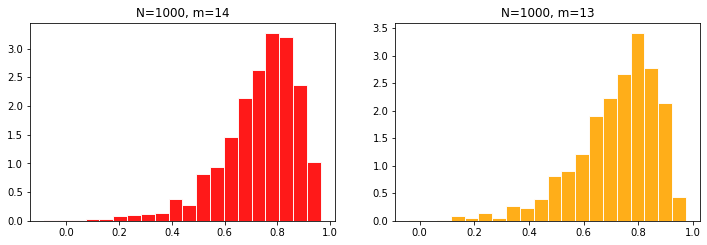

In [29]:
#Graficamos los histogramas de las correlaciones:
fig, ax=subplots(figsize=(12,8))
plt.subplot(221)
hist(m1,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9, facecolor='red')
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
plt.title(r'N={}, m={}'.format(N, m))


plt.subplot(222)
hist(m2,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9, facecolor='orange')
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
plt.title(r'N={}, m={}'.format(N, m-1))


show()

En el archivo 'Bootstrap parte 2'

Se menciona:

1. De tarea, obtener el error estandar de la correlacion y mostrar para que N la precisión con respecto a la correlación de la muestra total

2. Grafique los histogramas de las correlaciones

3. Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

## 1. De tarea, obtener el error estandar de la correlacion y mostrar para que N la precisión con respecto a la correlación de la muestra total

In [48]:
#La correlacion de la muestra total es 0.753.

corr= spearmanr(schools.LSAT, schools.GPA)[0]
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.753


In [37]:
def seq(start, end, by):
    return [by * n for n in range(int(start/by), int((end + by)/by))]

In [39]:
seq(start=20, end=100, by=10)

[20, 30, 40, 50, 60, 70, 80, 90, 100]

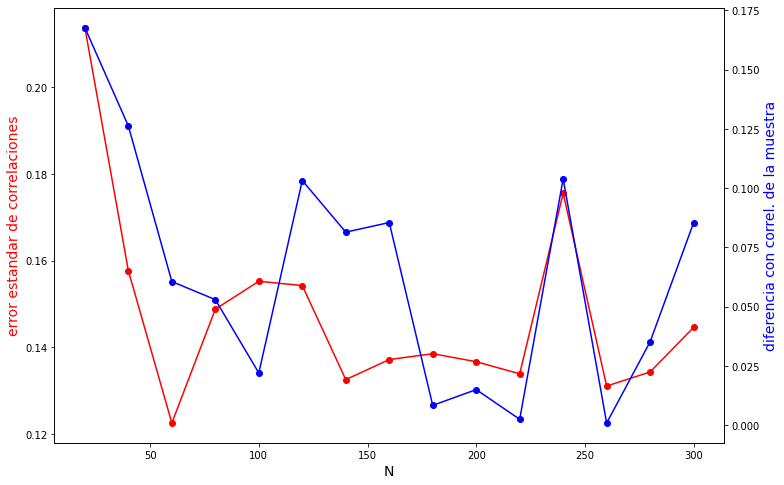

In [113]:
#El dataset de las escuelas tiene 82 observaciones. En la clase del Miercoles 20/10 se dijo que m=15, y N era el parametro.


fig,ax = plt.subplots(figsize=(12,8))

#Graficamos N=20,40,...,300 contra el error estandar de las correlaciones de N muestras bootstrap:
ax.plot(seq(start=20, end=300, by=20),[error_estandar(f1(N, m, schools)) for N in seq(start=20, end=300, by=20)], color="red", marker="o")
ax.set_xlabel("N",fontsize=14)
ax.set_ylabel("error estandar de correlaciones",color="red",fontsize=14)

# Dibujamos un eje y secundario para la diferencia de la moda de las correlaciones con la correlacion de la muestra total:
ax2=ax.twinx()
ax2.plot(seq(start=20, end=300, by=20),[abs(statistics.mode(f1(N, m, schools))-corr) for N in seq(start=20, end=300, by=20)],color="blue",marker="o")
ax2.set_ylabel("diferencia con correl. de la muestra",color="blue",fontsize=14)

show()

# Guardamos la grafica
fig.savefig('intento(1).jpg',
          format='jpeg',
          dpi=100,
          bbox_inches='tight')

#Al final, la N optima deberia disminuir error estandar, y diferencia con la correlacion de la muestra total.

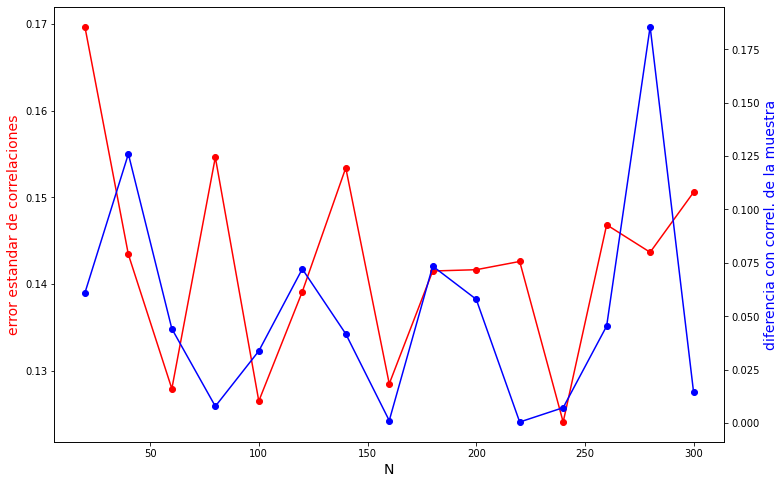

In [115]:
fig,ax = plt.subplots(figsize=(12,8))

#Graficamos N=20,40,...,300 contra el error estandar de las correlaciones de N muestras bootstrap:
ax.plot(seq(start=20, end=300, by=20),[error_estandar(f1(N, m, schools)) for N in seq(start=20, end=300, by=20)], color="red", marker="o")
ax.set_xlabel("N",fontsize=14)
ax.set_ylabel("error estandar de correlaciones",color="red",fontsize=14)

# Dibujamos un eje y secundario para la diferencia de la moda de las correlaciones con la correlacion de la muestra total:
ax2=ax.twinx()
ax2.plot(seq(start=20, end=300, by=20),[abs(statistics.mode(f1(N, m, schools))-corr) for N in seq(start=20, end=300, by=20)],color="blue",marker="o")
ax2.set_ylabel("diferencia con correl. de la muestra",color="blue",fontsize=14)

show()

# Guardamos la grafica
fig.savefig('intento(2).jpg',
          format='jpeg',
          dpi=100,
          bbox_inches='tight')

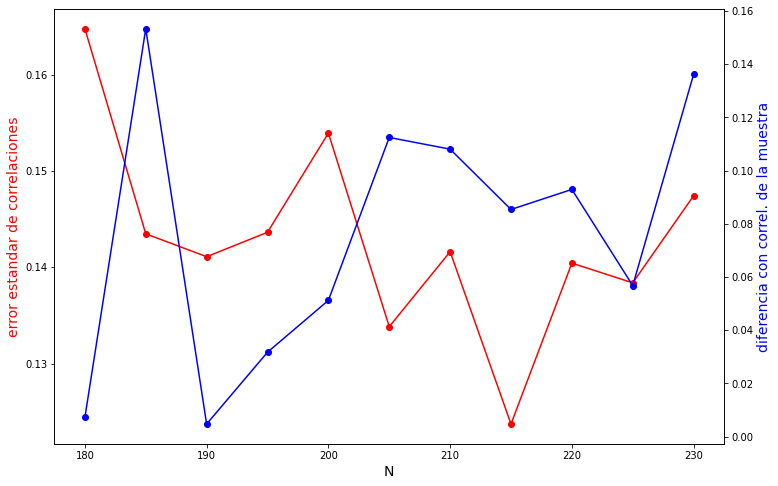

In [116]:
#Parece que no hay una N especifica, pero la mayoria de las veces, la que disminuye
#error estandar, y diferencia entre la moda de la muestra con la correlacion de la muestra original esta entre 180 y 230:
fig,ax = plt.subplots(figsize=(12,8))

#Graficamos N=180,185,...,230 contra el error estandar de las correlaciones de N muestras bootstrap:
ax.plot(seq(start=180, end=230, by=5),[error_estandar(f1(N, m, schools)) for N in seq(start=180, end=230, by=5)], color="red", marker="o")
ax.set_xlabel("N",fontsize=14)
ax.set_ylabel("error estandar de correlaciones",color="red",fontsize=14)

# Dibujamos un eje y secundario para la diferencia de la moda de las correlaciones con la correlacion de la muestra total:
ax2=ax.twinx()
ax2.plot(seq(start=180, end=230, by=5),[abs(statistics.mode(f1(N, m, schools))-corr) for N in seq(start=180, end=230, by=5)],color="blue",marker="o")
ax2.set_ylabel("diferencia con correl. de la muestra",color="blue",fontsize=14)

show()

# Guardamos la grafica
fig.savefig('intento(3).jpg',
          format='jpeg',
          dpi=100,
          bbox_inches='tight')

## 2. Grafique los histogramas de las correlaciones

m=15: 0.13664693462628902
m=15: 0.15632082247212697


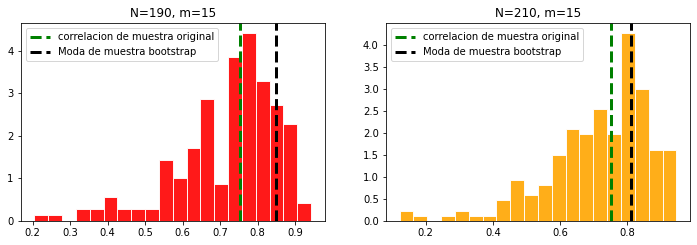

In [121]:
#Simulamos N muestras bootstrap de tamanio 15. Con base en el ejercicio anterior escogemos N=190 y N=210:

N1=190
m=15

m1=f1(N1, m, schools)
print('m={}: {}'.format(m, error_estandar(m1)))


N2=210
m2=f1(N2, m, schools)
print('m={}: {}'.format(m, error_estandar(m2)))


#Graficamos los histogramas de las correlaciones:
fig, ax=subplots(figsize=(12,8))
plt.subplot(221)
hist(m1,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9, facecolor='red')
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(x=corr,color='green', linestyle='--',linewidth=3,label="correlacion de muestra original")
axvline(x=statistics.mode(m1),color='black', linestyle='--',linewidth=3,label="Moda de muestra bootstrap")
plt.title(r'N={}, m={}'.format(N1, m))
legend()

plt.subplot(222)
hist(m2,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9, facecolor='orange')
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(x=corr,color='green', linestyle='--',linewidth=3,label="correlacion de muestra original")
axvline(x=statistics.mode(m2),color='black', linestyle='--',linewidth=3,label="Moda de muestra bootstrap")
plt.title(r'N={}, m={}'.format(N2, m))
legend()

show()

## 3. Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

m=82: 0.054796249649424394
m=82: 0.05922359913882367


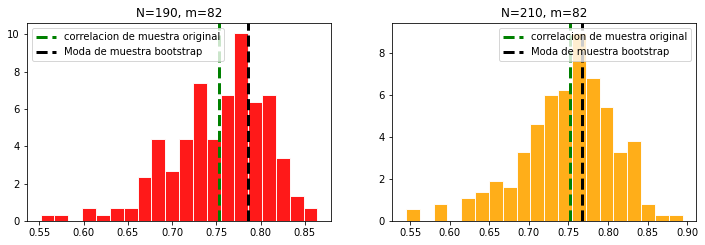

In [122]:
#Simulamos N muestras bootstrap del tamanio de la muestra completa: 82.
N1=190
m=82

m1=f1(N1, m, schools)
print('m={}: {}'.format(m, error_estandar(m1)))


N2=210
m2=f1(N2, m, schools)
print('m={}: {}'.format(m, error_estandar(m2)))


#Graficamos los histogramas de las correlaciones:
fig, ax=subplots(figsize=(12,8))
plt.subplot(221)
hist(m1,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9, facecolor='red')
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(x=corr,color='green', linestyle='--',linewidth=3,label="correlacion de muestra original")
axvline(x=statistics.mode(m1),color='black', linestyle='--',linewidth=3,label="Moda de muestra bootstrap")
plt.title(r'N={}, m={}'.format(N1, m))
legend()

plt.subplot(222)
hist(m2,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9, facecolor='orange')
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(x=corr,color='green', linestyle='--',linewidth=3,label="correlacion de muestra original")
axvline(x=statistics.mode(m2),color='black', linestyle='--',linewidth=3,label="Moda de muestra bootstrap")
plt.title(r'N={}, m={}'.format(N2, m))
legend()

show()

# Problema 3.  Me acomodo mas en R.